<h1>EMPLOYEE BURNOUT PREDICTION</h1>

<p>Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.</p>

<h3>IMPORTING NECESSARY LABRARIES</h3>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pickle
import os


<h3>LOADING DATASET</h3>

In [5]:
data = pd.read_excel(r"C:\Users\Dell\OneDrive\Documents\employee_burnout_analysis-AI.xlsx")

<h3>DATA OVERVIEW</h3>

In [6]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [7]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [8]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [9]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [10]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [12]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [13]:
data.isnull().sum().values.sum()

np.int64(4622)

<h3>EXPLORATORY DATA ANALYSIS</h3>

<P>There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe</p>

In [14]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

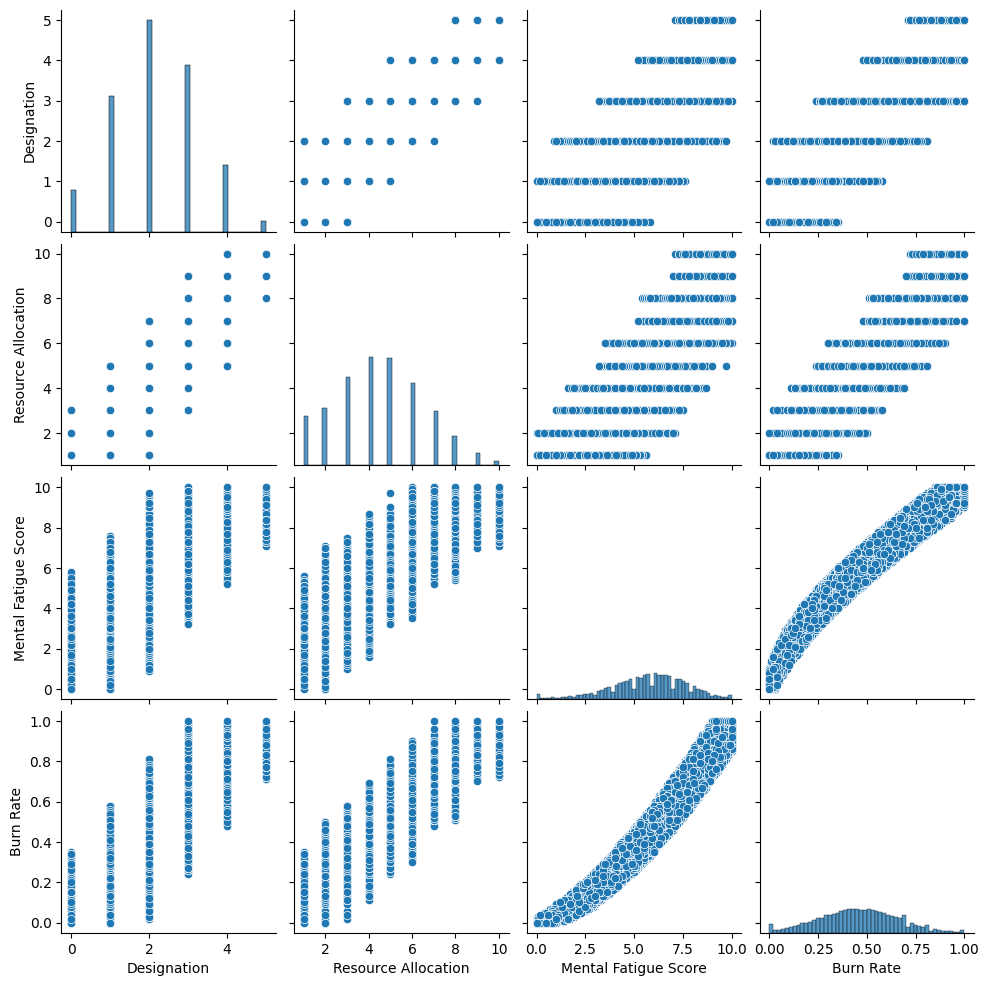

In [15]:
sns.pairplot(data)
plt.show()

<p>Drop off all observations with NaN values of our dataframe </p>

In [16]:
data=data.dropna()

In [17]:
data.shape

(18590, 9)

<p> Analyzing what type of data is each variable </p>

In [18]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

<p>The values that each variable contains</p>

<p>The employee ID doesn't provide any useful information and ,therefore ,they must be  droped</p>

In [19]:
data=data.drop('Employee ID',axis=1)

<p>Checking the correlation of date of joining with target variable </p>

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

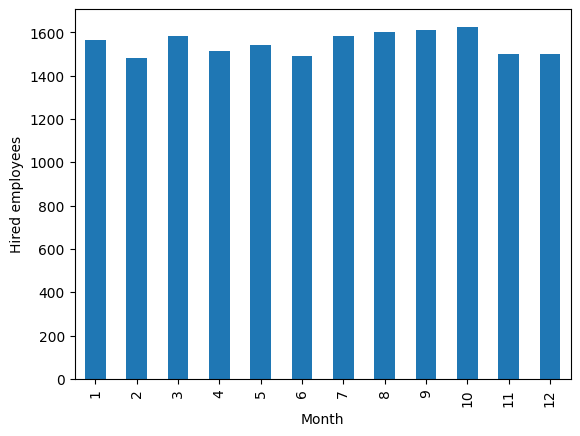

In [20]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month',ylabel="Hired employees")


<p>The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked</p>

In [21]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [22]:
numeric_data=data.select_dtypes(include=['number'])
correlation=numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [23]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [24]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [25]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


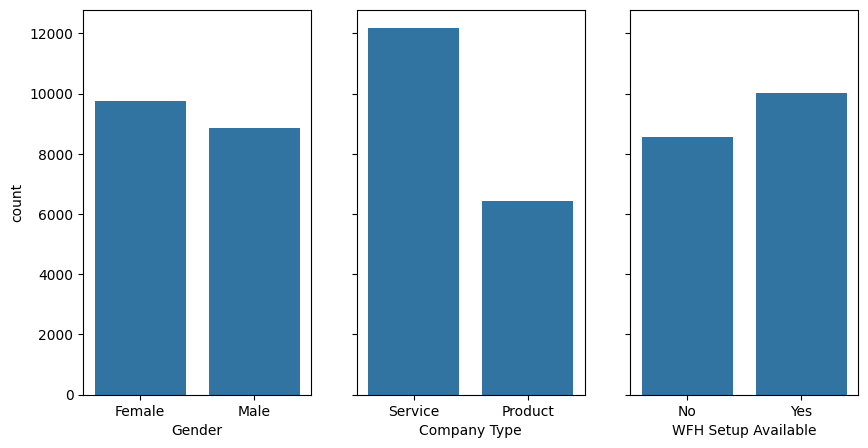

In [26]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
  sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


<p>The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.</p>

<h3>One-Hot Encoding fofr categorical features</h3>

In [27]:
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    print(data.columns)

<h3>Preprocessing<h3>

In [28]:
y=data['Burn Rate']
X=data.drop('Burn Rate', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [30]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'

os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [31]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [32]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [33]:
import os
import pickle

path='../data/processed/'

os.makedirs(path,exist_ok=True)

X_train.to_csv(path + 'X_train_processe.csv',index=False)
y_train.to_csv(path + 'y_train_processe.csv',index=False)

<h3>Model Building</h3>

<h4>LINEAR REGRESSION</h4>

In [34]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [35]:
print("Linear Regression Model Performance Metrics:\n")

y_pred=linear_regression_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Sqaured Error:",mse)
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error:",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)


r2=r2_score(y_test,y_pred)
print("R-squared Score:",r2)

Linear Regression Model Performance Metrics:

Mean Sqaured Error: 0.003156977911361073
Root Mean Squared Error: 0.056186990588223115
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<p>Based on the evaluation metrics, the Linear Regression model appears to be the best model for predicting burnout analysis.

It has the lowest mean squared error, root mean squared error, and mean absolute error, indicating better accuracy and precision in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

So we are choosing this model for deployment.</p>

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Ridge Regression Model Performance Metrics:\n")


Ridge Regression Model Performance Metrics:



In [37]:
ridge_model = Ridge(alpha=1.0, random_state=42)

In [38]:
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [39]:
y_pred = ridge_model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0031570102877027705


In [41]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.05618727869992255


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.04594967269168725


In [43]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9188218417343478


start

<h3>Data Preparation
</h3>

In [44]:
# Define features and target variable
X = data.drop(columns=['Burn Rate'])  # Drop the target variable
y = data['Burn Rate']  # Define the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.model_selection import GridSearchCV


<h3>Hyperparameter Tuning for Ridge Regression
</h3>

In [46]:
# Set up the Ridge regression model
ridge = Ridge()

# Define a range of alpha values to test
alphas = np.logspace(-4, 4, 50)

# Set up GridSearchCV to find the best alpha
param_grid = {'alpha': alphas}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
ridge_cv.fit(X_train, y_train)

# Best alpha value
best_alpha = ridge_cv.best_params_['alpha']
print(f'Best alpha: {best_alpha}')


Best alpha: 24.420530945486497


<h3>Model Training</h3>

In [51]:
# Train the Ridge regression model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)




Ridge(alpha=np.float64(24.420530945486497))

<h3>Model Evaluation</h3>

In [52]:
# uses the trained Ridge Regression model (ridge_best) to predict the target values for the test set features
ridge_pred = ridge_best.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge Regression MSE: {ridge_mse}, R-squared: {ridge_r2}')


Ridge Regression MSE: 0.0030637547393543, R-squared: 0.920224663990256


<h3>Coefficient Analysis
</h3>

<p>Comparing these coefficients helps to see how the regularization in Ridge Regression (which penalizes large coefficients) affects the feature importance compared to standard Linear Regression.</p>

                   Feature  Ridge Coefficients  Linear Coefficients
0              Designation           -0.004472            -0.004568
1      Resource Allocation            0.028451             0.028459
2     Mental Fatigue Score            0.074029             0.074090
3     Company Type_Service            0.000325             0.000329
4  WFH Setup Available_Yes           -0.011064            -0.011113
5              Gender_Male            0.004702             0.004714


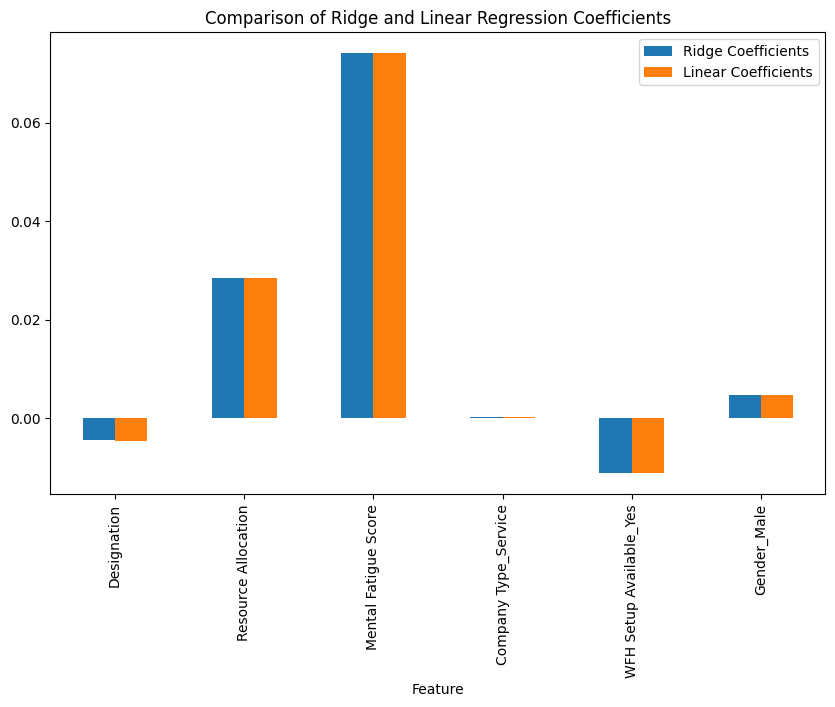

In [49]:
# Compare coefficients
ridge_coefficients = ridge_best.coef_
linear_coefficients = linear_model.coef_

# Create a DataFrame to compare coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge Coefficients': ridge_coefficients,
    'Linear Coefficients': linear_coefficients
})

print(coef_df)

# Plotting the coefficients for comparison
coef_df.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Ridge and Linear Regression Coefficients')
plt.show()


<p>The most influential feature is the Mental Fatigue Score, as it has the highest positive coefficient in both models. This suggests that employees with higher mental fatigue are more likely to have a higher Burn Rate.</p>

<h3>Plotting Cross-Validation Results
</h3>

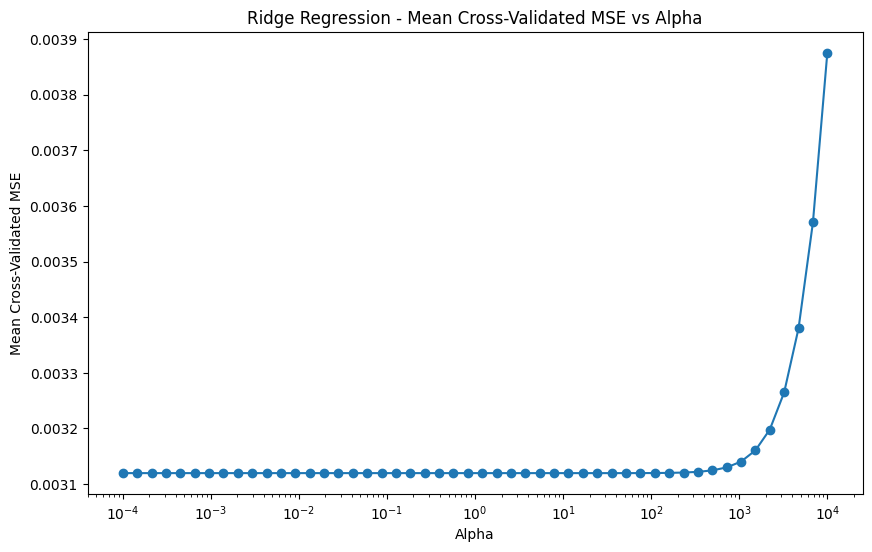

In [50]:
# Plot the cross-validated MSE vs alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, -ridge_cv.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validated MSE')
plt.title('Ridge Regression - Mean Cross-Validated MSE vs Alpha')
plt.show()
